### Tutorial 9: Calculating the density and heat capacity of an SiO-CO plasma

The most common use of minplascalc is expected to be the calculation of thermophysical properties of plasmas in LTE as a function of elemental composition, temperature, and pressure. For the more complex SiO-CO plasma, mixtures must be created as described in <a href="Tutorial 7 - SiCO Plasma LTE Composition.ipynb">Tutorial 7</a> to specify the plasma species present and the relative proportions of elements. 

For this tutorial we'll look at three different SiO-CO mixtures ranging from 10% SiO to 90% SiO by mole to show how the properties are affected by different mixture ratios.

Start off by loading up the modules required.

In [1]:
%matplotlib inline
import numpy
from matplotlib import pyplot

import minplascalc as mpc

Next, we create some minplascalc LTE mixture objects as before.

In [2]:
species = [
    "O2",
    "O2+",
    "O",
    "O+",
    "O++",
    "CO",
    "CO+",
    "C",
    "C+",
    "C++",
    "SiO",
    "SiO+",
    "Si",
    "Si+",
    "Si++",
]
x0s = [[0, 0, 0, 0, 0, 1 - sio, 0, 0, 0, 0, sio, 0, 0, 0, 0] for sio in [0.1, 0.5, 0.9]]
sicomixes = [mpc.mixture.lte_from_names(species, x0, 1000, 101325) for x0 in x0s]

Next, set a range of temperatures to calculate the thermophysical properties at - in this case we're going from 1000 to 25000 K. Also initialise lists to store the property values for the various mixtures at each temperature.

In [3]:
temperatures = numpy.linspace(1000, 25000, 100)
densities = [[] for i in range(3)]
cps = [[] for i in range(3)]

Now we can perform the property calculations. We loop over all mixtures, and then all the temperatures setting the LTE object's temperature attribute to the appropriate value, and calculating the plasma density and heat capacity by calling the LTE object's <span style="font-family: 'Courier';">calculate_density()</span> and <span style="font-family: 'Courier';">calculate_heat_capacity()</span> functions. Internally, these make calls to  <span style="font-family: 'Courier';">calculate_composition()</span> to obtain the composition of the plasma before the calculation of the properties. 

Note that execution of these calculations is fairly compute intensive (increasingly so for increasing number of species present) and as a result the following code snippet may take a couple minutes or more to complete.

In [4]:
for i, sicomix in enumerate(sicomixes):
    for T in temperatures:
        sicomix.T = T
        densities[i].append(sicomix.calculate_density())
        cps[i].append(sicomix.calculate_heat_capacity())

Now we can visualise the properties by plotting them against temperature, to see how they vary.

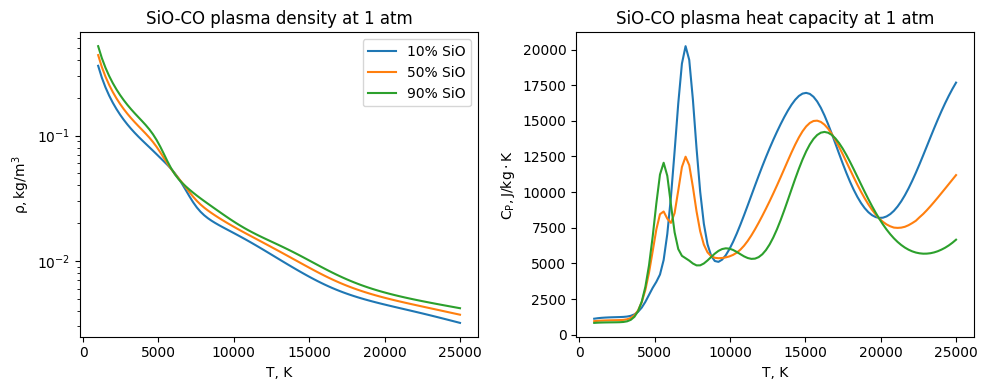

In [5]:
fig, axs = pyplot.subplots(1, 2, figsize=(10, 4))

labels = ["10% SiO", "50% SiO", "90% SiO"]

ax = axs[0]
ax.set_title("SiO-CO plasma density at 1 atm")
ax.set_xlabel("T, K")
ax.set_ylabel("$\\mathregular{\\rho, kg/m^3}$")
for dens, lbl in zip(densities, labels):
    ax.semilogy(temperatures, dens, label=lbl)
ax.legend()

ax = axs[1]
ax.set_title("SiO-CO plasma heat capacity at 1 atm")
ax.set_xlabel("T, K")
ax.set_ylabel(r"$\mathregular{C_P, J/kg \cdot K}$")
for hcp, lbl in zip(cps, labels):
    ax.plot(temperatures, hcp, label=lbl)

pyplot.tight_layout()

The impact of changing the elemental composition of the plasma is quite marked, particularly in the case of the heat capacity - the multiple overlapping peaks representing dissociation and ionisation of the various species move around considerably depending on whether the plasma is formed from mostly SiO, or mostly CO. The general trend is toward slightly lower values of $C_P$ and slightly higher values of $\rho$ for SiO-rich plasmas, but it does depend which temperature regime is being considered.